In [1]:
#Import relevant packages for analyses 
from matplotlib import pyplot as plt 
import numpy as np
import pandas as pd
import xarray as xr   
import momlevel as ml 
import cftime
import cmocean 
from cartopy import crs as ccrs, feature as cfeature 

#Define figures to be of certain size
%matplotlib inline                                     
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6 

## CESM-H Data Analysis

In [2]:
### CESM-H SST data

### Pre EOT
cesmh_sst_PREEOT = xr.open_dataset('B.EO_2_C4xt31_h.pop.h.climo.cat.nc')
cesmh_sst_cg_PREEOT = xr.open_dataset('B.EO_2_C4xt31_h.pop.h.climo.cat_um_bil.nc')

### Post EOT
cesmh_sst_POSTEOT = xr.open_dataset('B.EO_1_C4xt31_h.pop.h.climo.cat.nc')
cesmh_sst_cg_POSTEOT = xr.open_dataset('B.EO_1_C4xt31_h.pop.h.climo.cat_um_bil.nc')

### SST Data

In [3]:
cesmh_sst_cg_PREEOT

<xarray.Dataset>
Dimensions:    (latitude: 73, longitude: 96)
Coordinates:
  * latitude   (latitude) float64 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * longitude  (longitude) float64 0.0 3.75 7.5 11.25 ... 348.8 352.5 356.2
Data variables:
    temp       (latitude, longitude) float64 ...
Attributes:
    history:  interp_temp.py on B.EO_2_C4xt31_h.pop.h.climo.cat.nc \n

In [4]:
#Find difference of CESMH SST data on common grid
diff_sst = cesmh_sst_cg_POSTEOT - cesmh_sst_cg_PREEOT

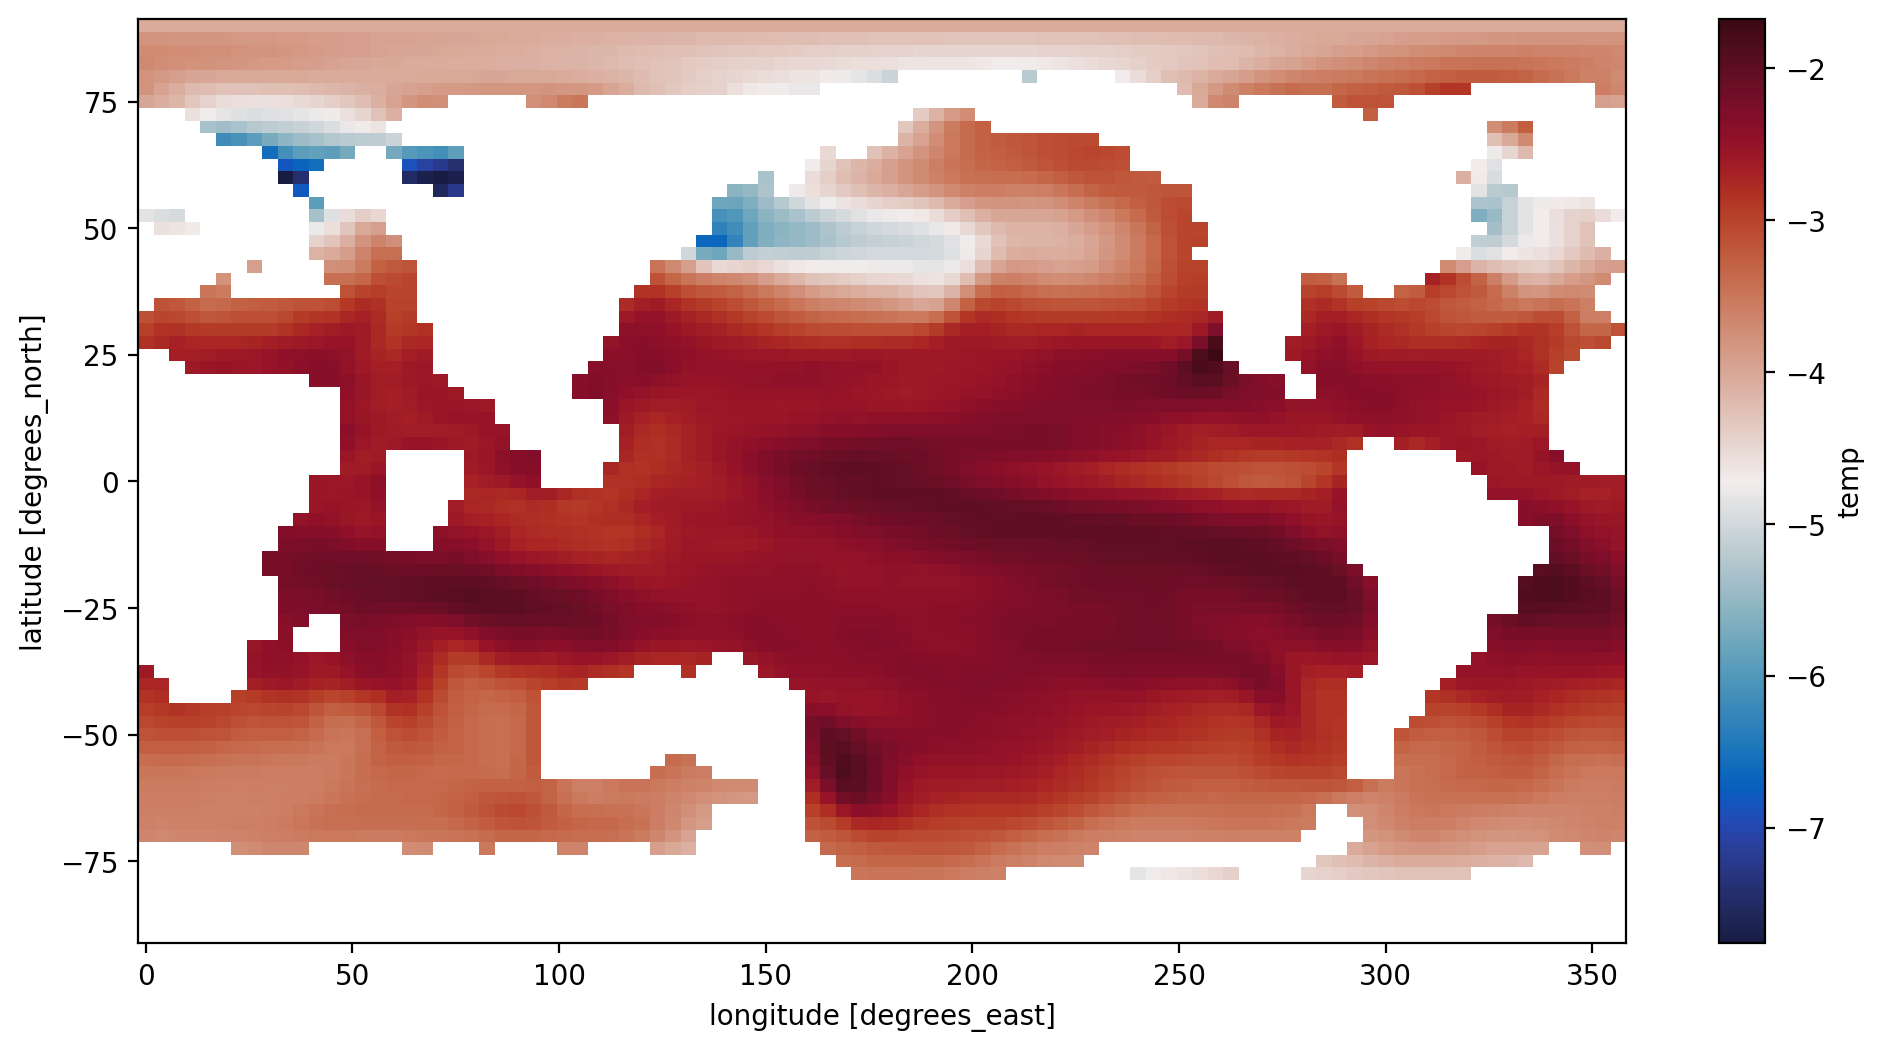

In [5]:
#Plot SST difference in data
diff_sst.temp.plot(cmap=cmocean.cm.balance)

### Depth Transects

In [6]:
#Define SST along S. Atlantic 65S transect pre- and post- EOT
pre_atl = cesmh_sst_PREEOT.TEMP.sel(nlat=25).isel(time=0)
post_atl = cesmh_sst_POSTEOT.TEMP.sel(nlat=25).isel(time=0)

#Find SST difference across EOT boundary
diff_atl = post_atl - pre_atl

In [7]:
#Define SST at surface for pre- and post- EOT 
pre_surface = cesmh_sst_PREEOT.TEMP.isel(z_t=0).isel(time=0)
post_surface = cesmh_sst_POSTEOT.TEMP.isel(z_t=0).isel(time=0)
diff_surface = post_surface - pre_surface

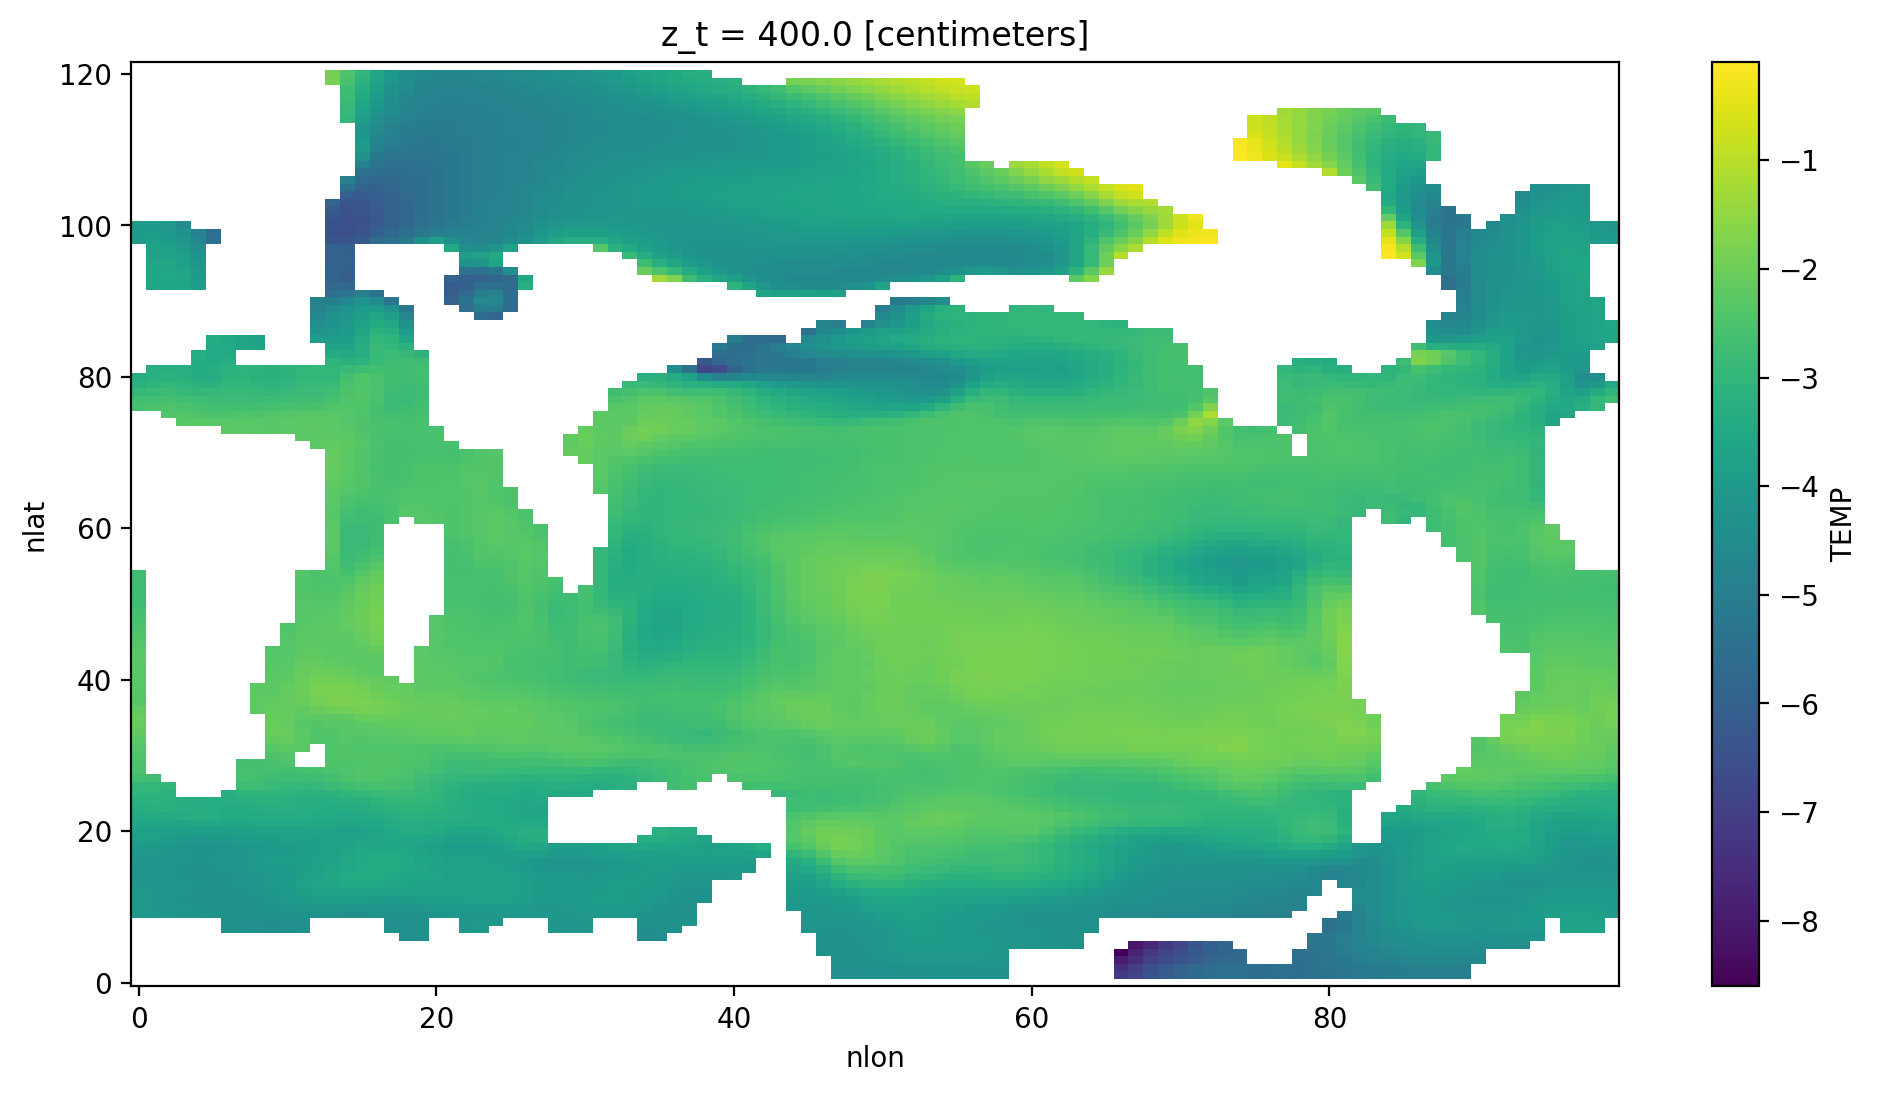

In [8]:
#Plot SST difference in data
diff_surface.plot()

Text(0.5, 1.0, 'Temperature PRE-EOT Along 65S Line')

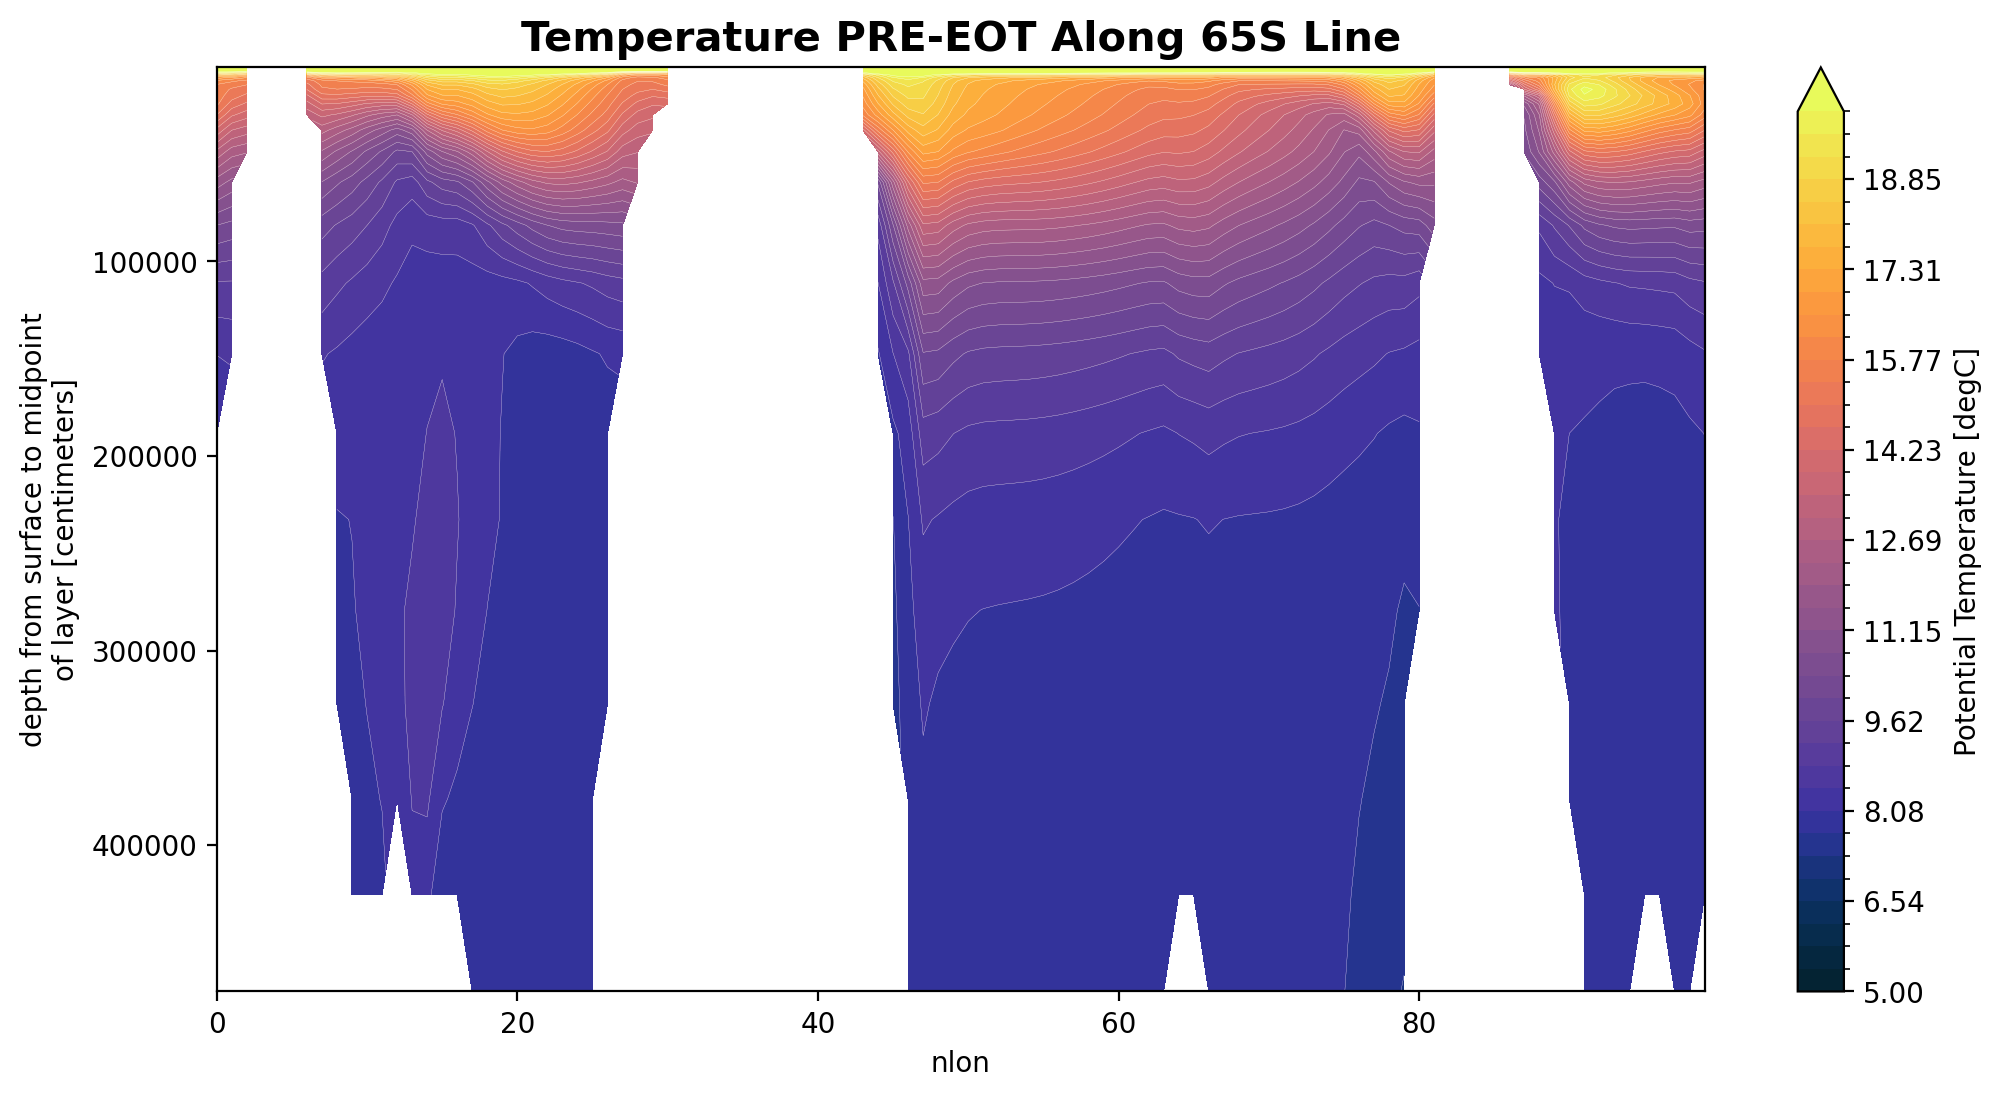

In [9]:
#Plot temperature acorss 65S transect, PREEOT  
pre_atl.plot.contourf(yincrease=False,vmin=5,   #Add cbar for temp gradient
              vmax=20,levels=40,
              cmap=cmocean.cm.thermal)
pre_atl.plot.contour(yincrease=False,vmin=5,    #Add lines between temp differences
             vmax=20,
             levels=40, colors='white', linewidths=0.1)
plt.title("CESM-H: Temperature PRE-EOT Along 65S Line", fontweight='bold', fontsize=15) #Create title

#### **Figure 1.** Transect of sea temperature across the 65S latitude line prior to the EOT in degrees Celsius. Temperature at the surface starts at 20 degrees and decreases to around 8 degrees near the bottom of the ocean basins. Temperature data used was generated by the CESM-H model. Model data was run and compiled by Goldner et al (2014).

Text(0.5, 1.0, 'Temperature POST-EOT Along 65S Line')

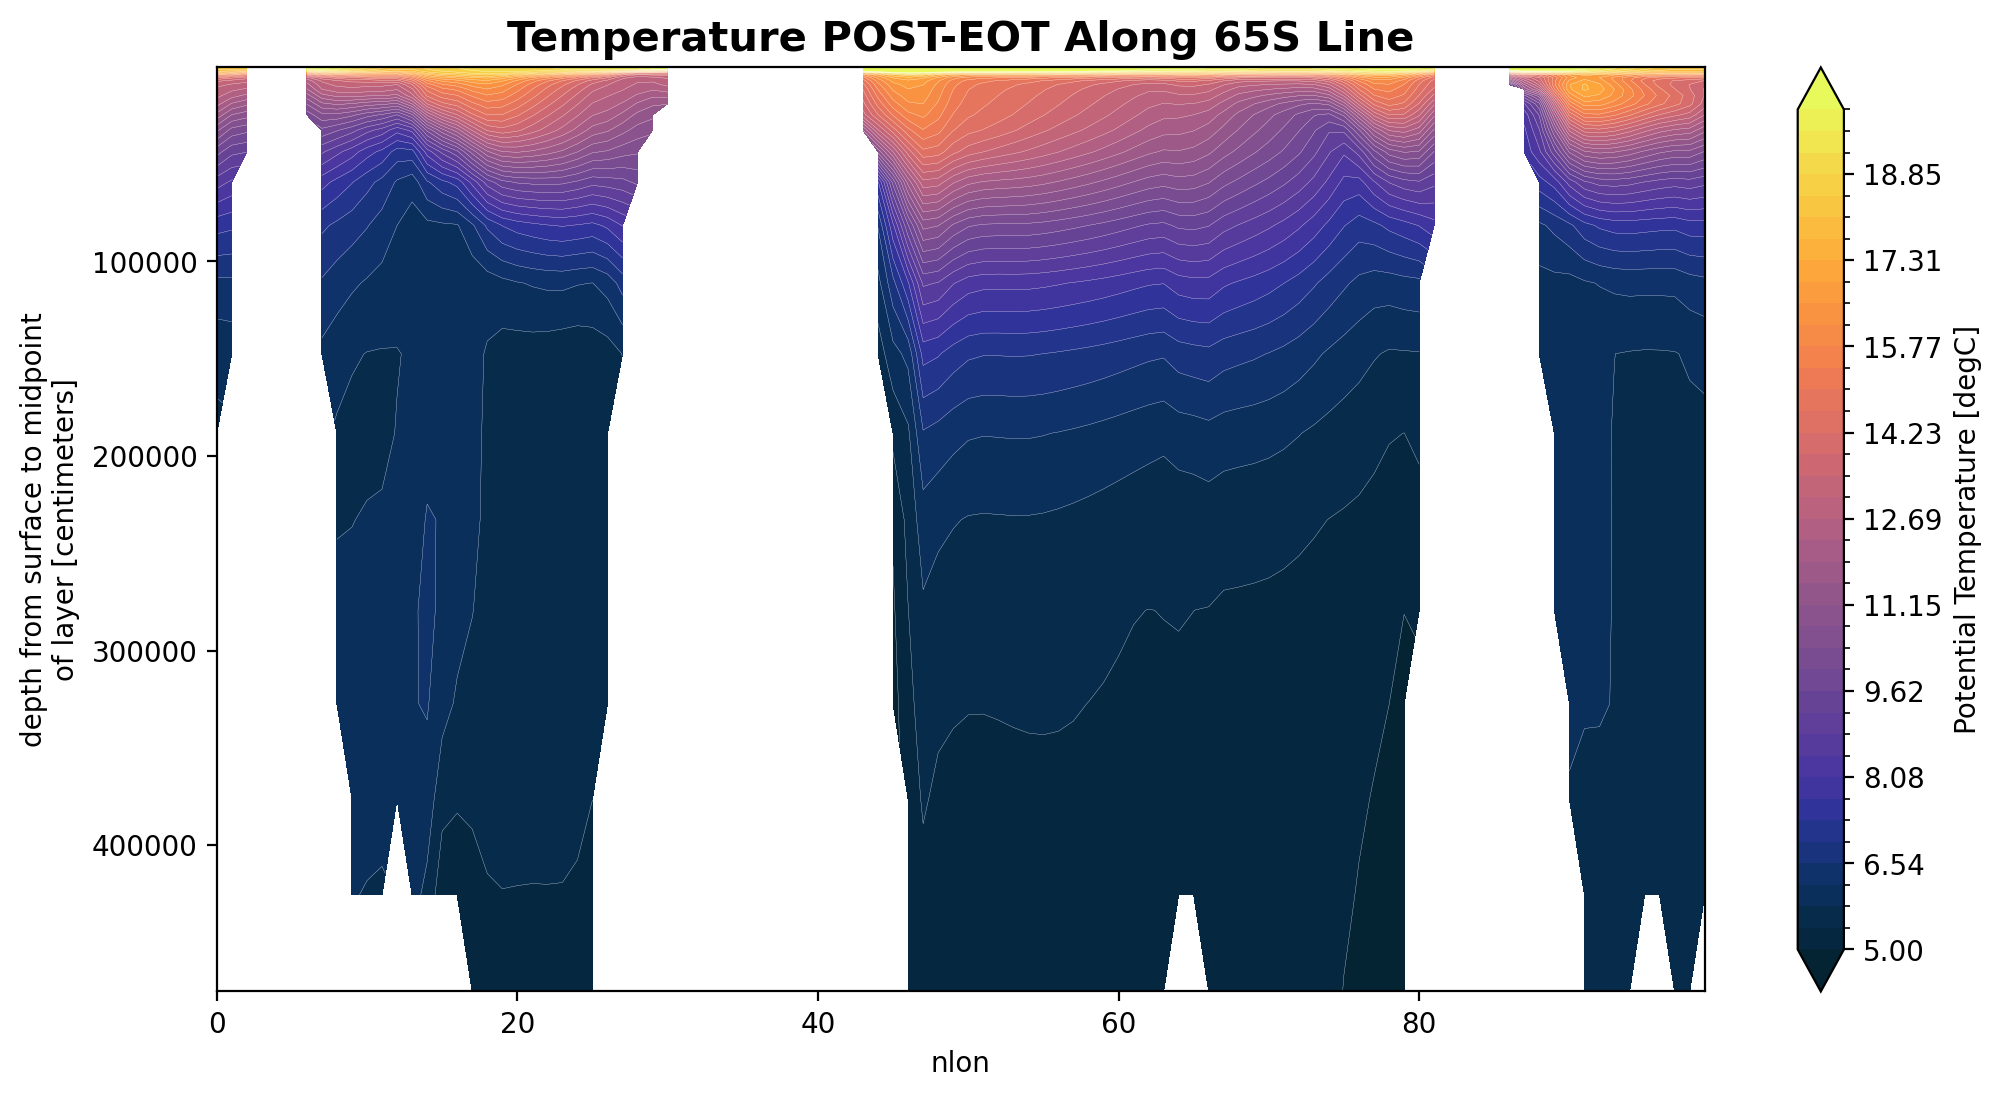

In [10]:
#Plot temperature acorss 65S transect, POSTEOT 
post_atl.plot.contourf(yincrease=False,vmin=5, #Add cbar for temp gradient
             vmax=20,
             levels=40, cmap=cmocean.cm.thermal) #Add lines between temp differences
post_atl.plot.contour(yincrease=False,vmin=5,
             vmax=20,
             levels=40, colors='white', linewidths=0.1)
plt.title("CESM-H: Temperature POST-EOT Along 65S Line", fontweight='bold', fontsize=15) #Plot title

#### **Figure 2.** Transect of sea temperature across the 65S latitude line after the EOT in degrees Celsius. Temperature at the surface starts at 20 degrees and decreases to around 5 degrees near the bottom of the ocean basins. Temperature data used was generated by the CESM-H model. Model data was run and compiled by Goldner et al (2014).

In [12]:
#Define variables for SST along equator for pre- & post- EOT
pre_equator = cesmh_sst_PREEOT.TEMP.sel(nlat=60).isel(time=0)
post_equator = cesmh_sst_POSTEOT.TEMP.sel(nlat=60).isel(time=0)
#Define variable of difference in SST across EOT
diff_equator = post_equator - pre_equator

Text(0.5, 1.0, 'Temperature Change Across the EOT Along 65S Line')

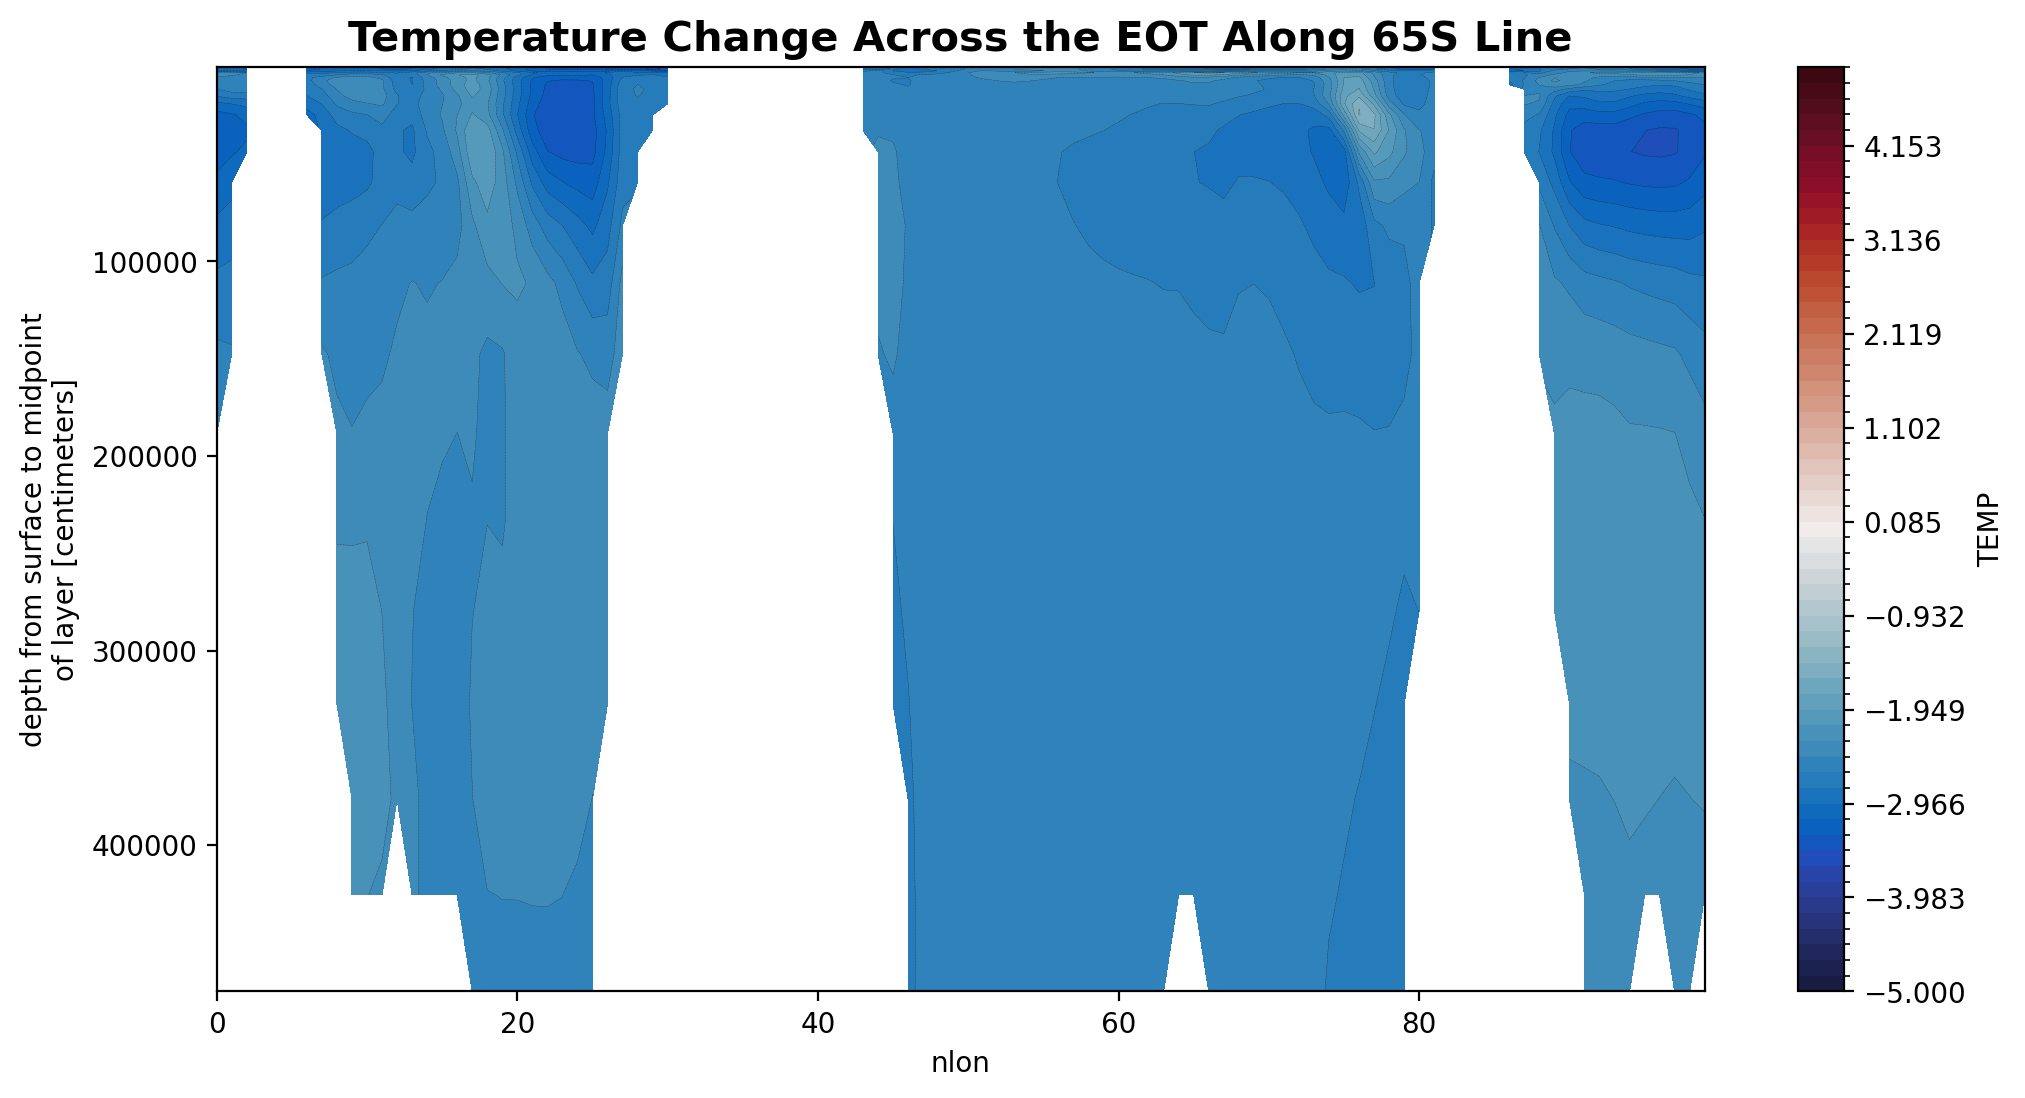

In [11]:
#Plot temperature difference across EOT along 65S transect 
diff_atl.plot.contourf(yincrease=False,vmin=-5, #Add cbar for temp change gradient
              vmax=5,levels=60,
              cmap=cmocean.cm.balance)
diff_atl.plot.contour(yincrease=False, #Add lines between temp differences
             vmin=-5,
             vmax=5,
             levels=60,colors='black',linewidths=0.1)
plt.title("CESM-H: Temperature Change Across the EOT Along 65S Line", fontweight='bold', fontsize=15) #Set title

#### **Figure 3.** Transect of sea temperature change over the EOT boundary across the 65S latitude line in degrees Celsius. Temperature decreases in all the oceanic basins with the most pronounced cooling in the upper 1500 m. The cooling mass near the surface is likely the beginning of the formation of the Antarctic Circumpolar Current. Temperature data used was generated by the CESM-H model Temperature data used was generated by the CESM-H model. Model data was run and compiled by Goldner et al (2014).

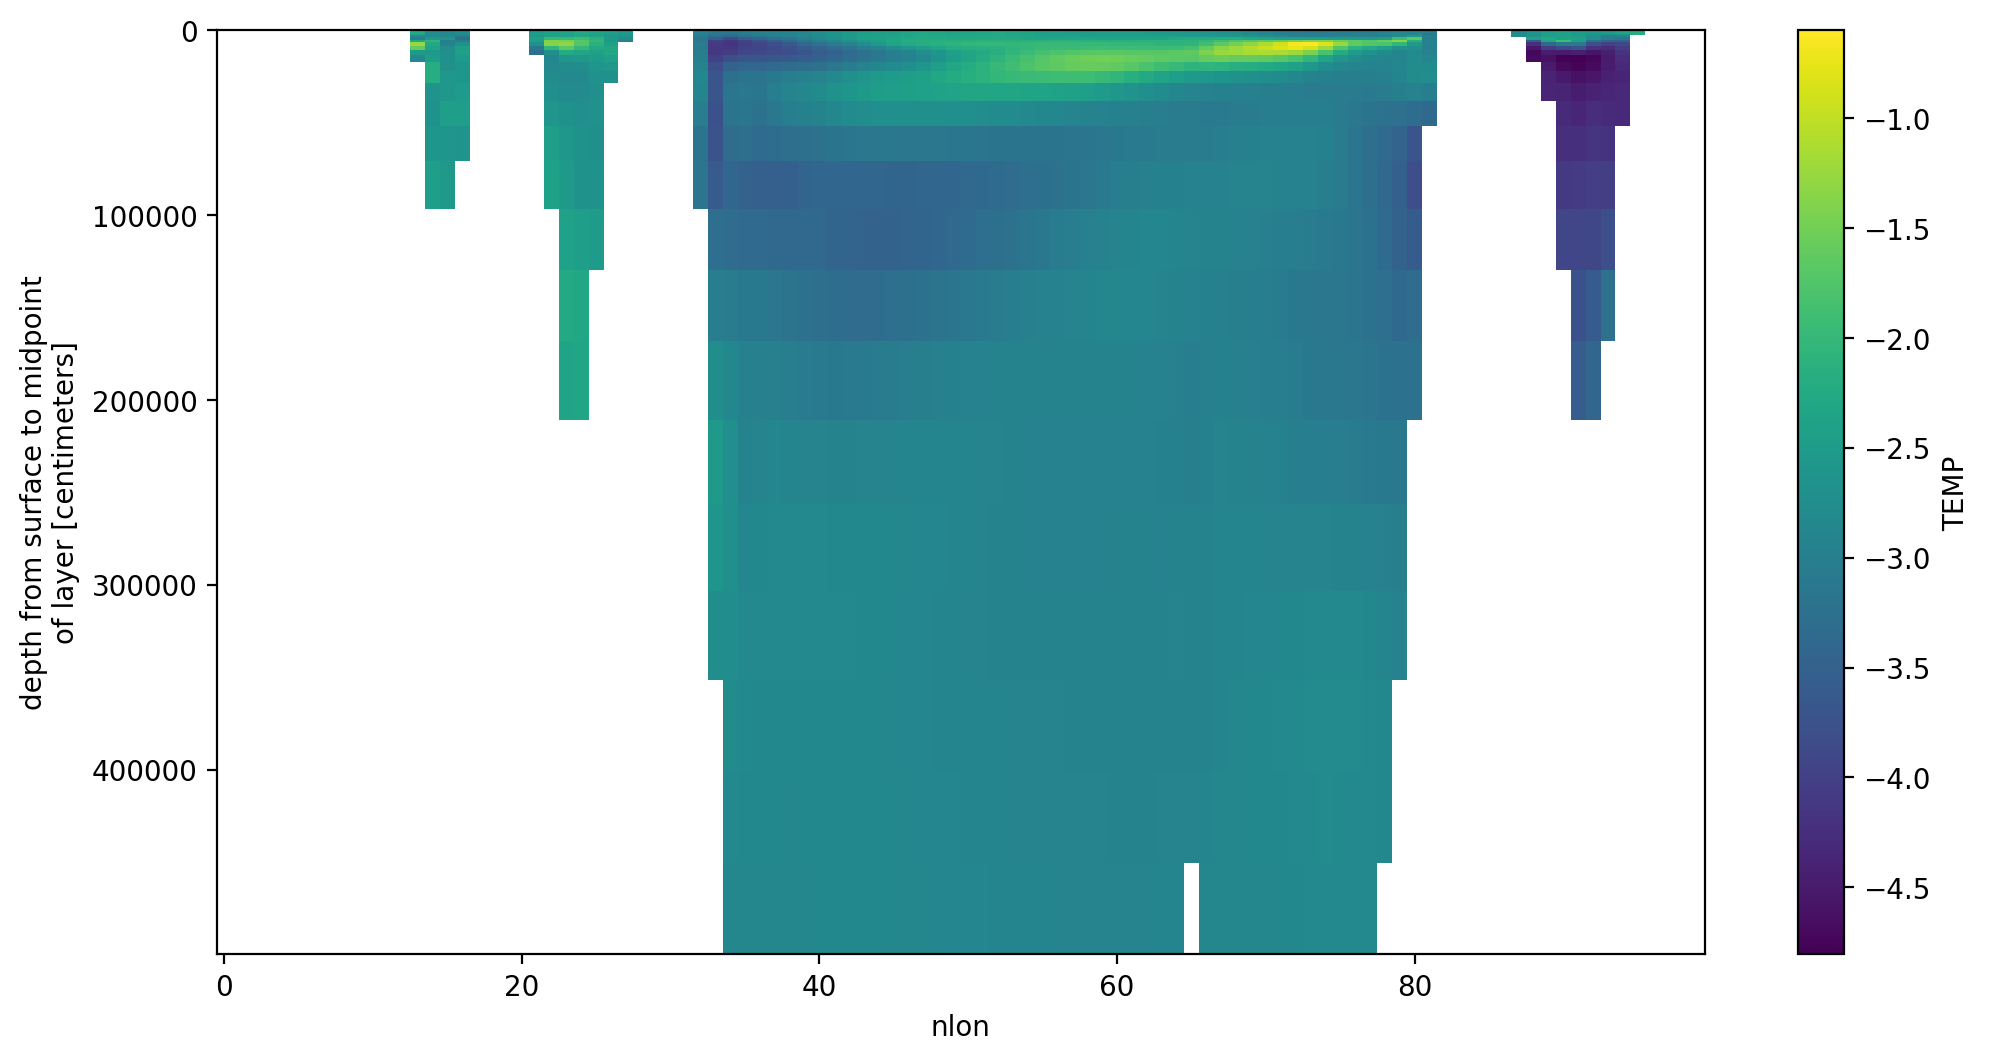

In [13]:
#Plot temperature difference across equator
diff_equator.plot(yincrease=False)

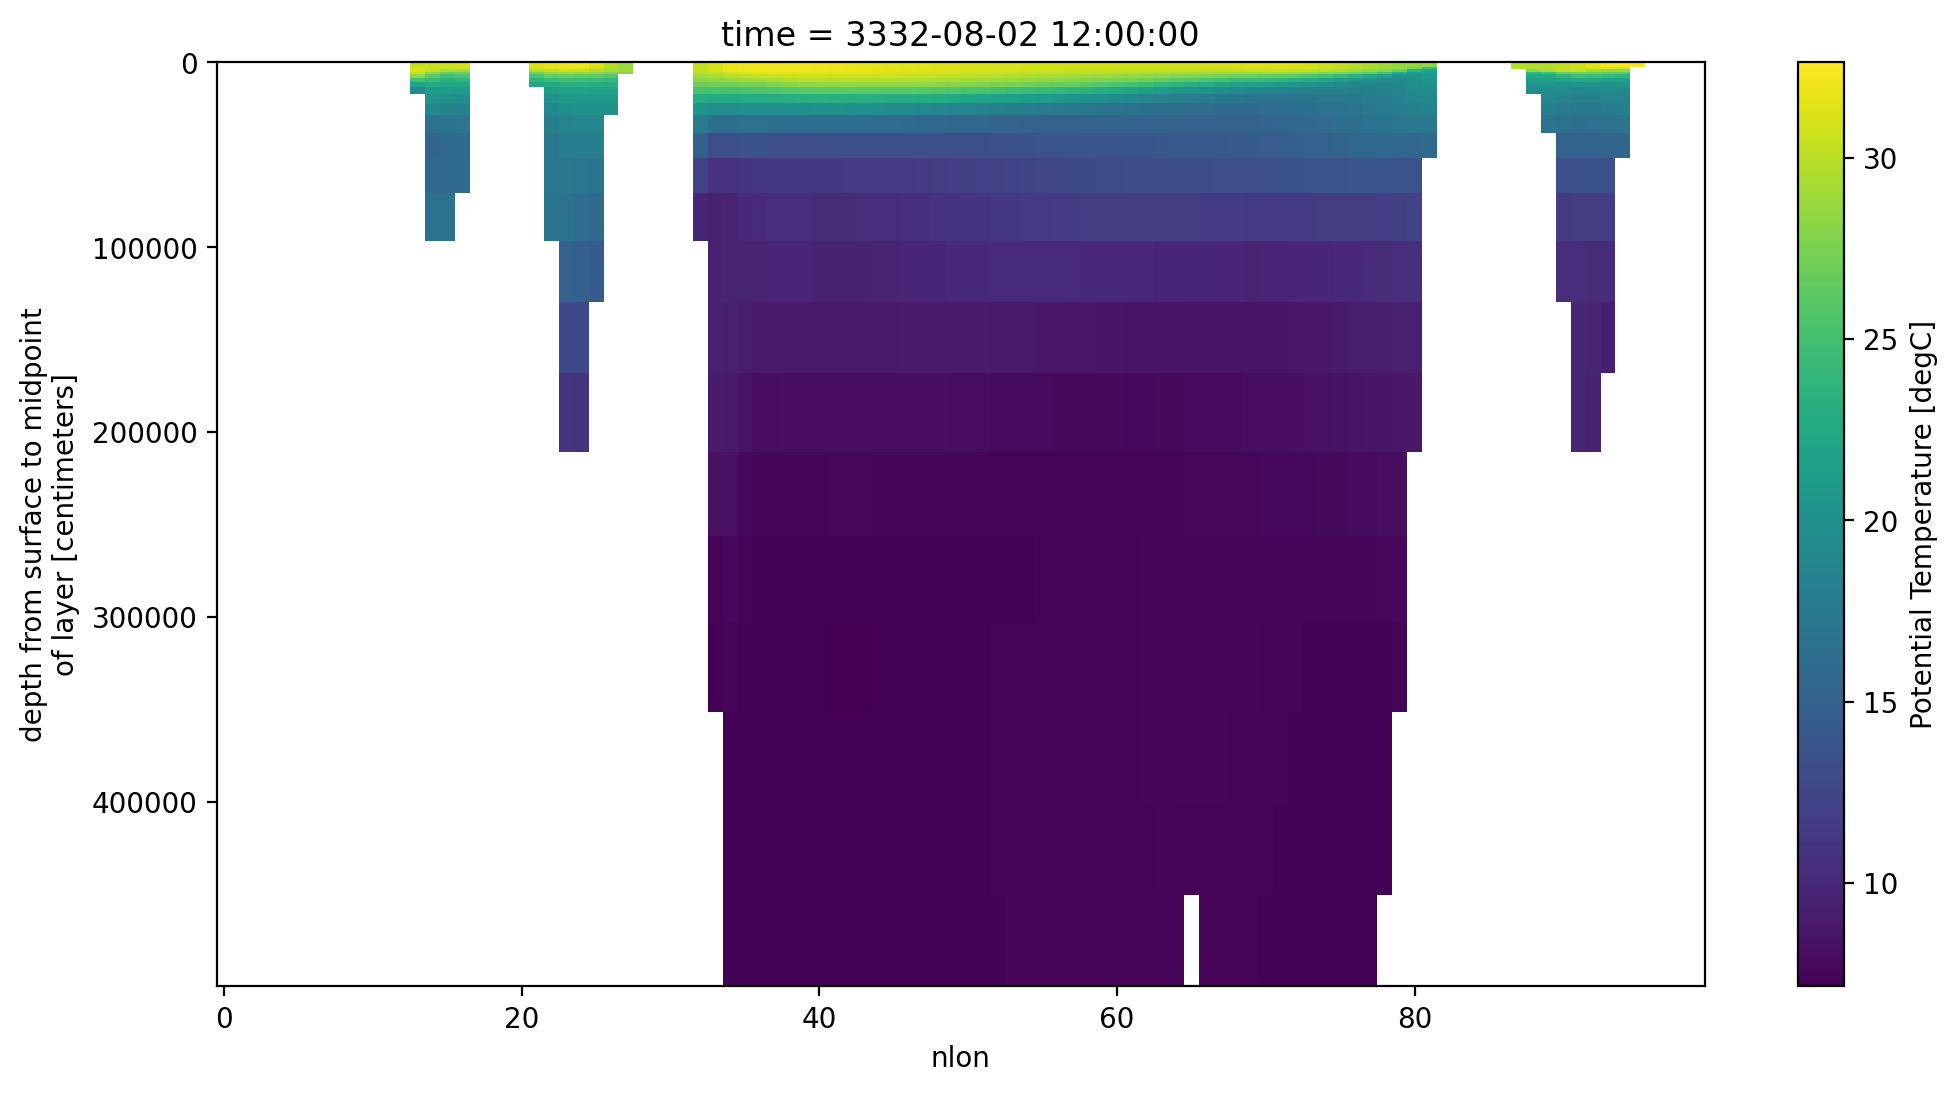

In [14]:
pre_equator.plot(yincrease=False)

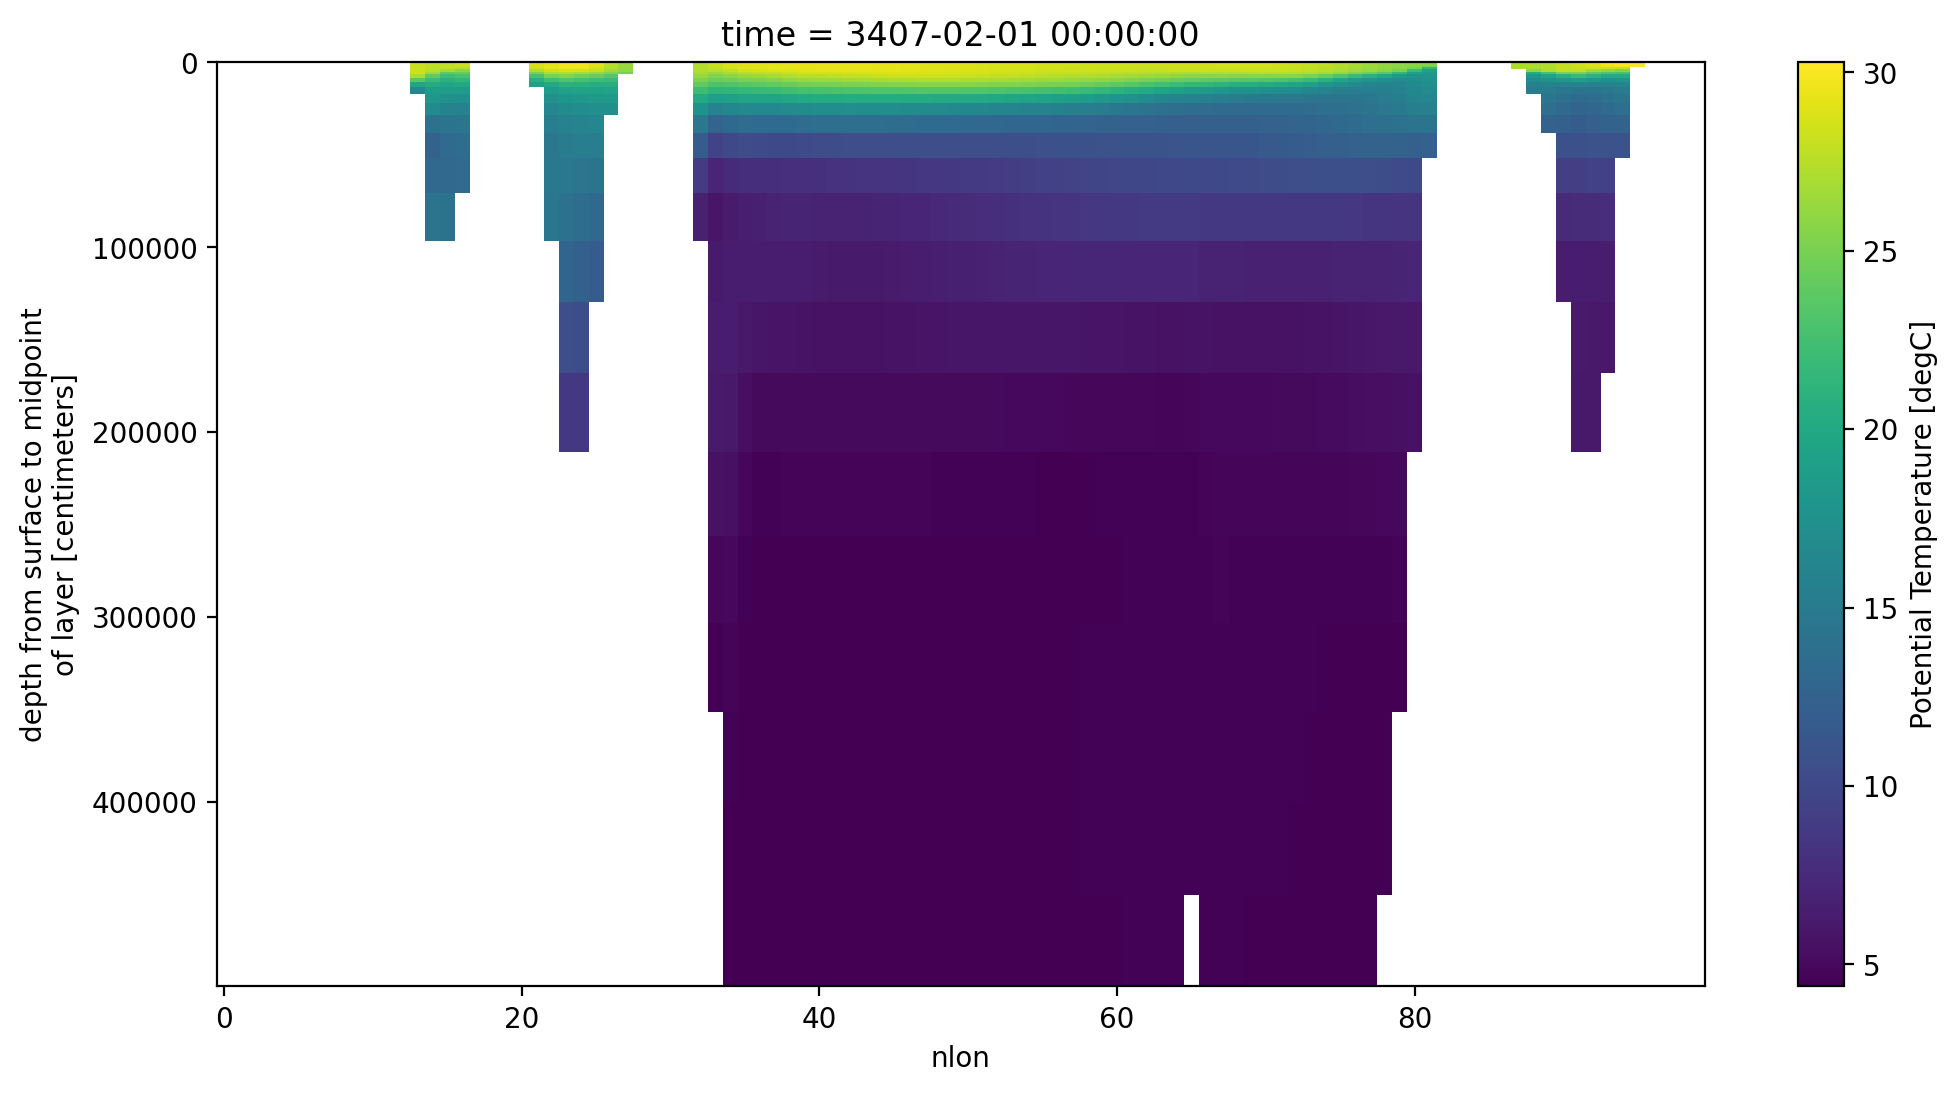

In [15]:
post_equator.plot(yincrease=False)

Text(0.5, 1.0, 'Temperature PRE-EOT Along the Equator')

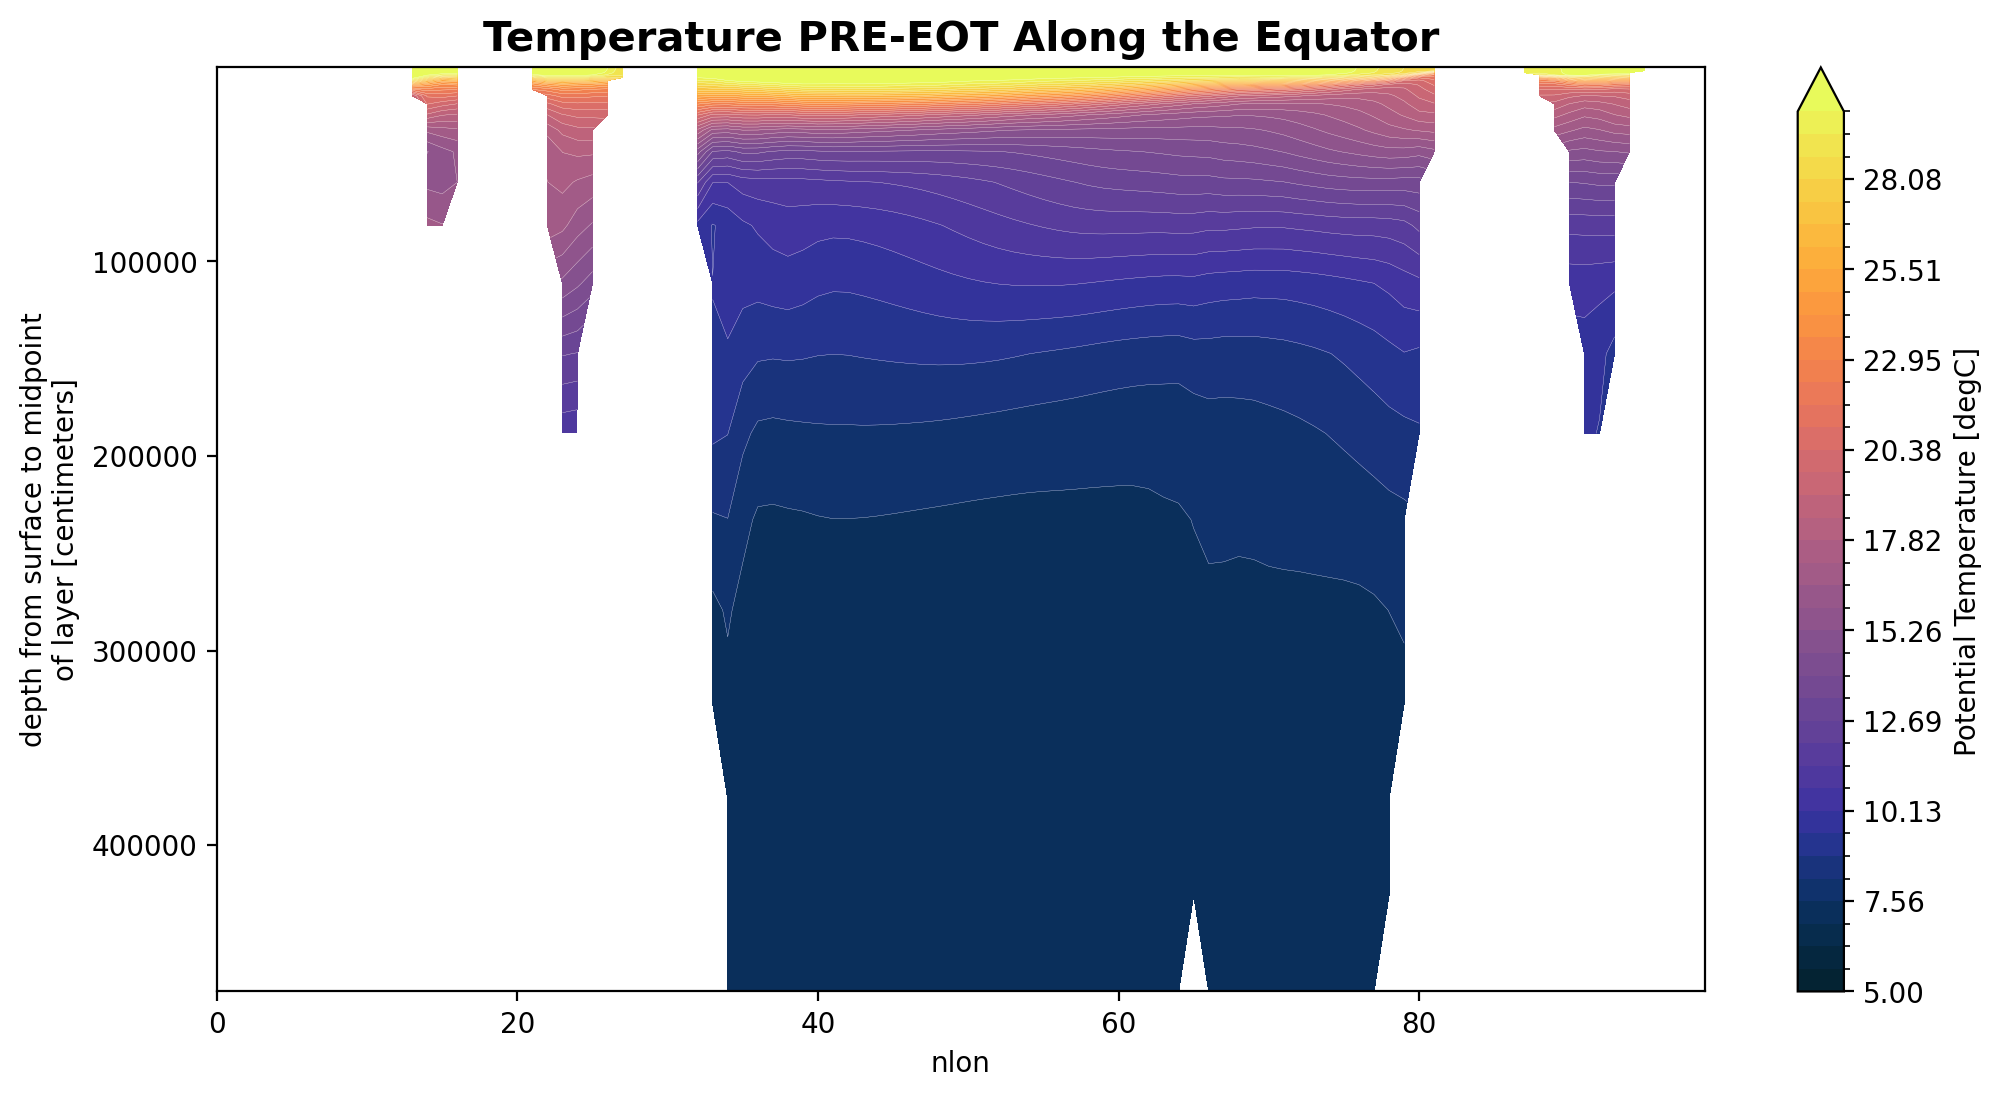

In [16]:
#Plot SST PRE-EOT along equator 
pre_equator.plot.contourf(yincrease=False,vmin=5, #Add cbar for temp gradient
              vmax=30,levels=40,
              cmap=cmocean.cm.thermal)
pre_equator.plot.contour(yincrease=False, #Add lines between temp differences
             vmin=-5,
             vmin=5,
             vmax=30,
             levels=40,colors='white',linewidths=0.1)
plt.title("CESM-H: Temperature PRE-EOT Along the Equator", fontweight='bold', fontsize=15) #Set title

#### **Figure 4.** Transect of sea temperature across the Equator prior to the EOT in degrees Celsius. Temperature at the surface starts at 30 degrees and decreases to around 7.5 degrees at 2500m below the surface. Temperature data used was generated by the CESM-H model. Model data was run and compiled by Goldner et al (2014).

Text(0.5, 1.0, 'Temperature POST-EOT Along the Equator')

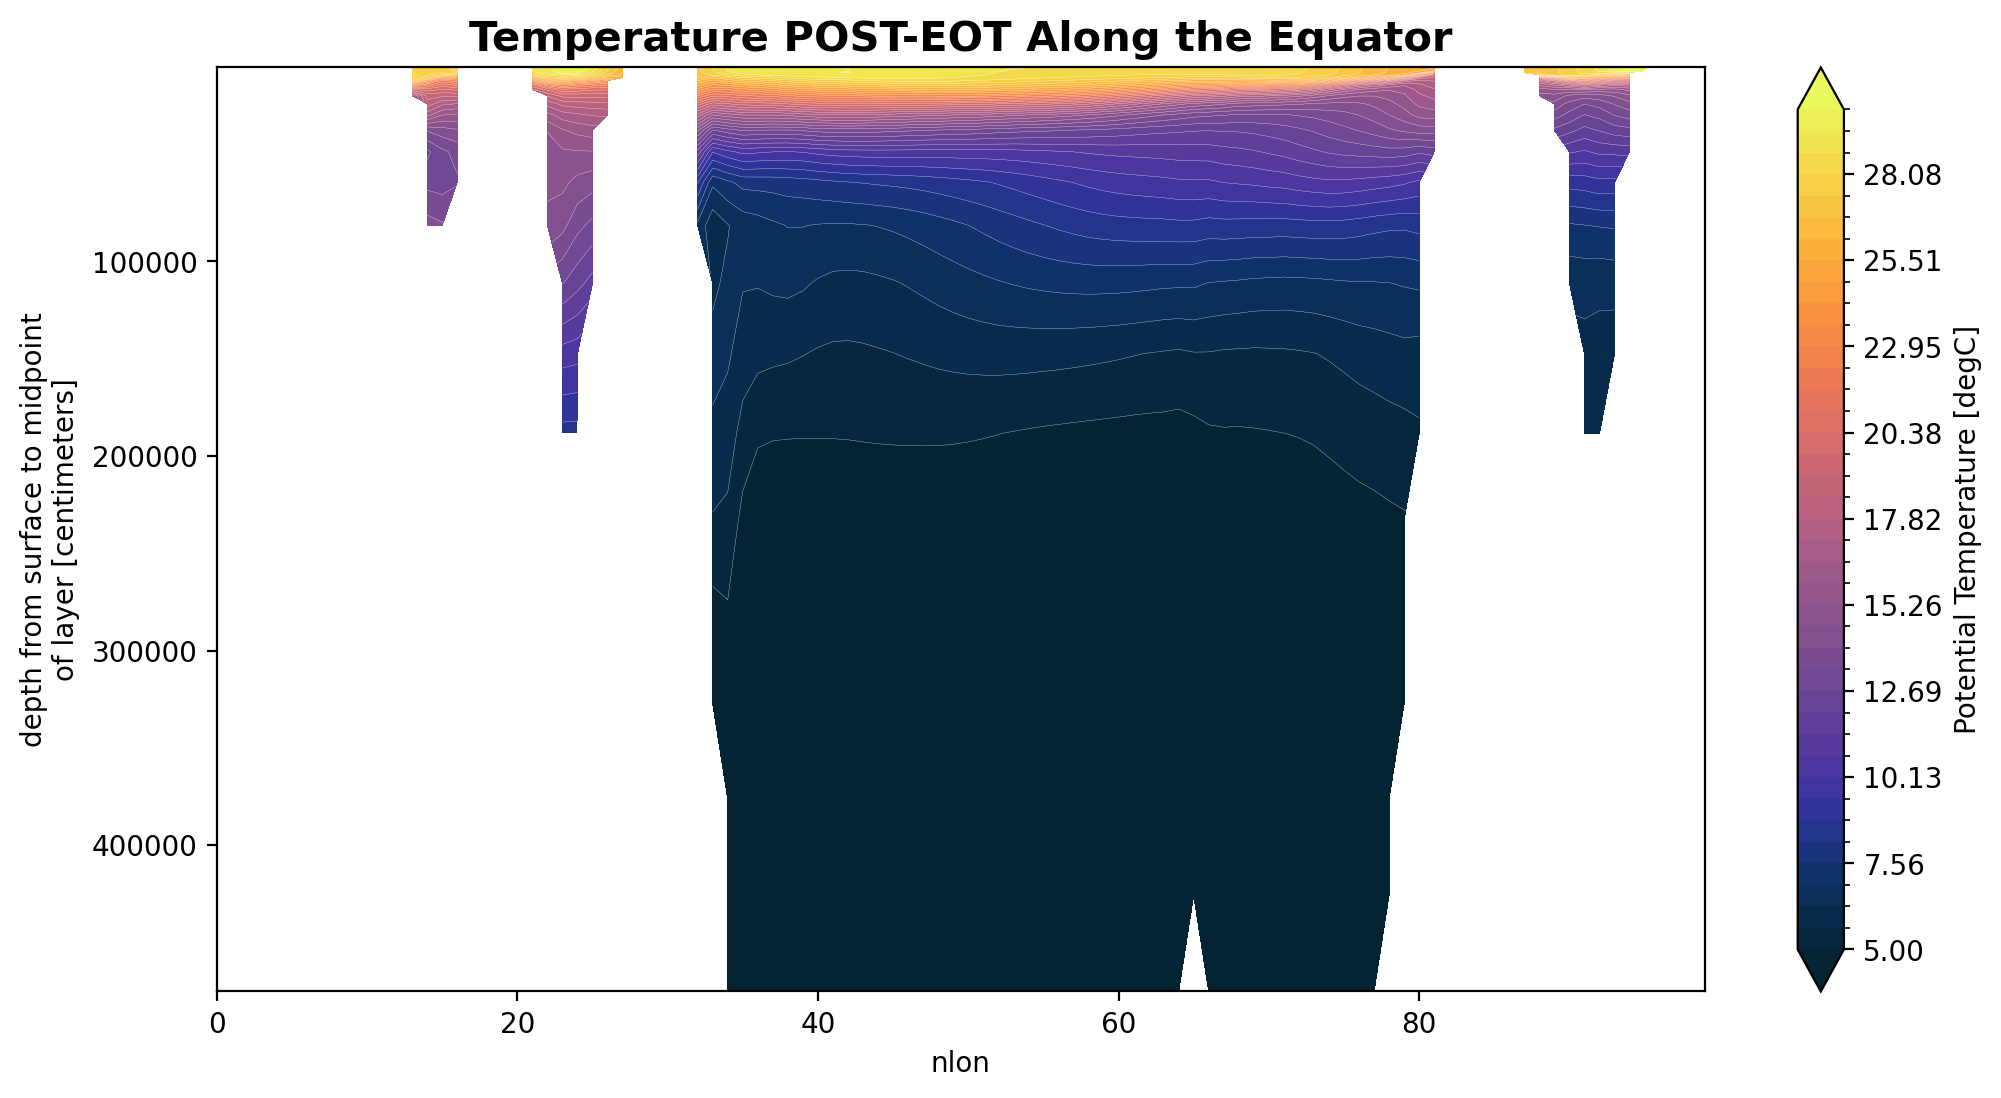

In [17]:
#Plot SST POST-EOT along equator 
post_equator.plot.contourf(yincrease=False,vmin=5, #Add cbar for temp gradient
              vmax=30,levels=40,
              cmap=cmocean.cm.thermal)
post_equator.plot.contour(yincrease=False,  #Add lines between temp differences
             vmin=-5,
             vmin=5,
             vmax=30,
             levels=40,colors='white',linewidths=0.1)
plt.title("CESM-H: Temperature POST-EOT Along the Equator", fontweight='bold', fontsize=15) #Set title

#### **Figure 5.** Transect of sea temperature across the Equator after the EOT in degrees Celsius. Temperature at the surface starts at 30 degrees and decreases to around 5 degrees at 2000m below the surface. Temperature data used was generated by the CESM-H model. Model data was run and compiled by Goldner et al (2014).

Text(0.5, 1.0, 'Temperature Change Across the EOT Along the Equator')

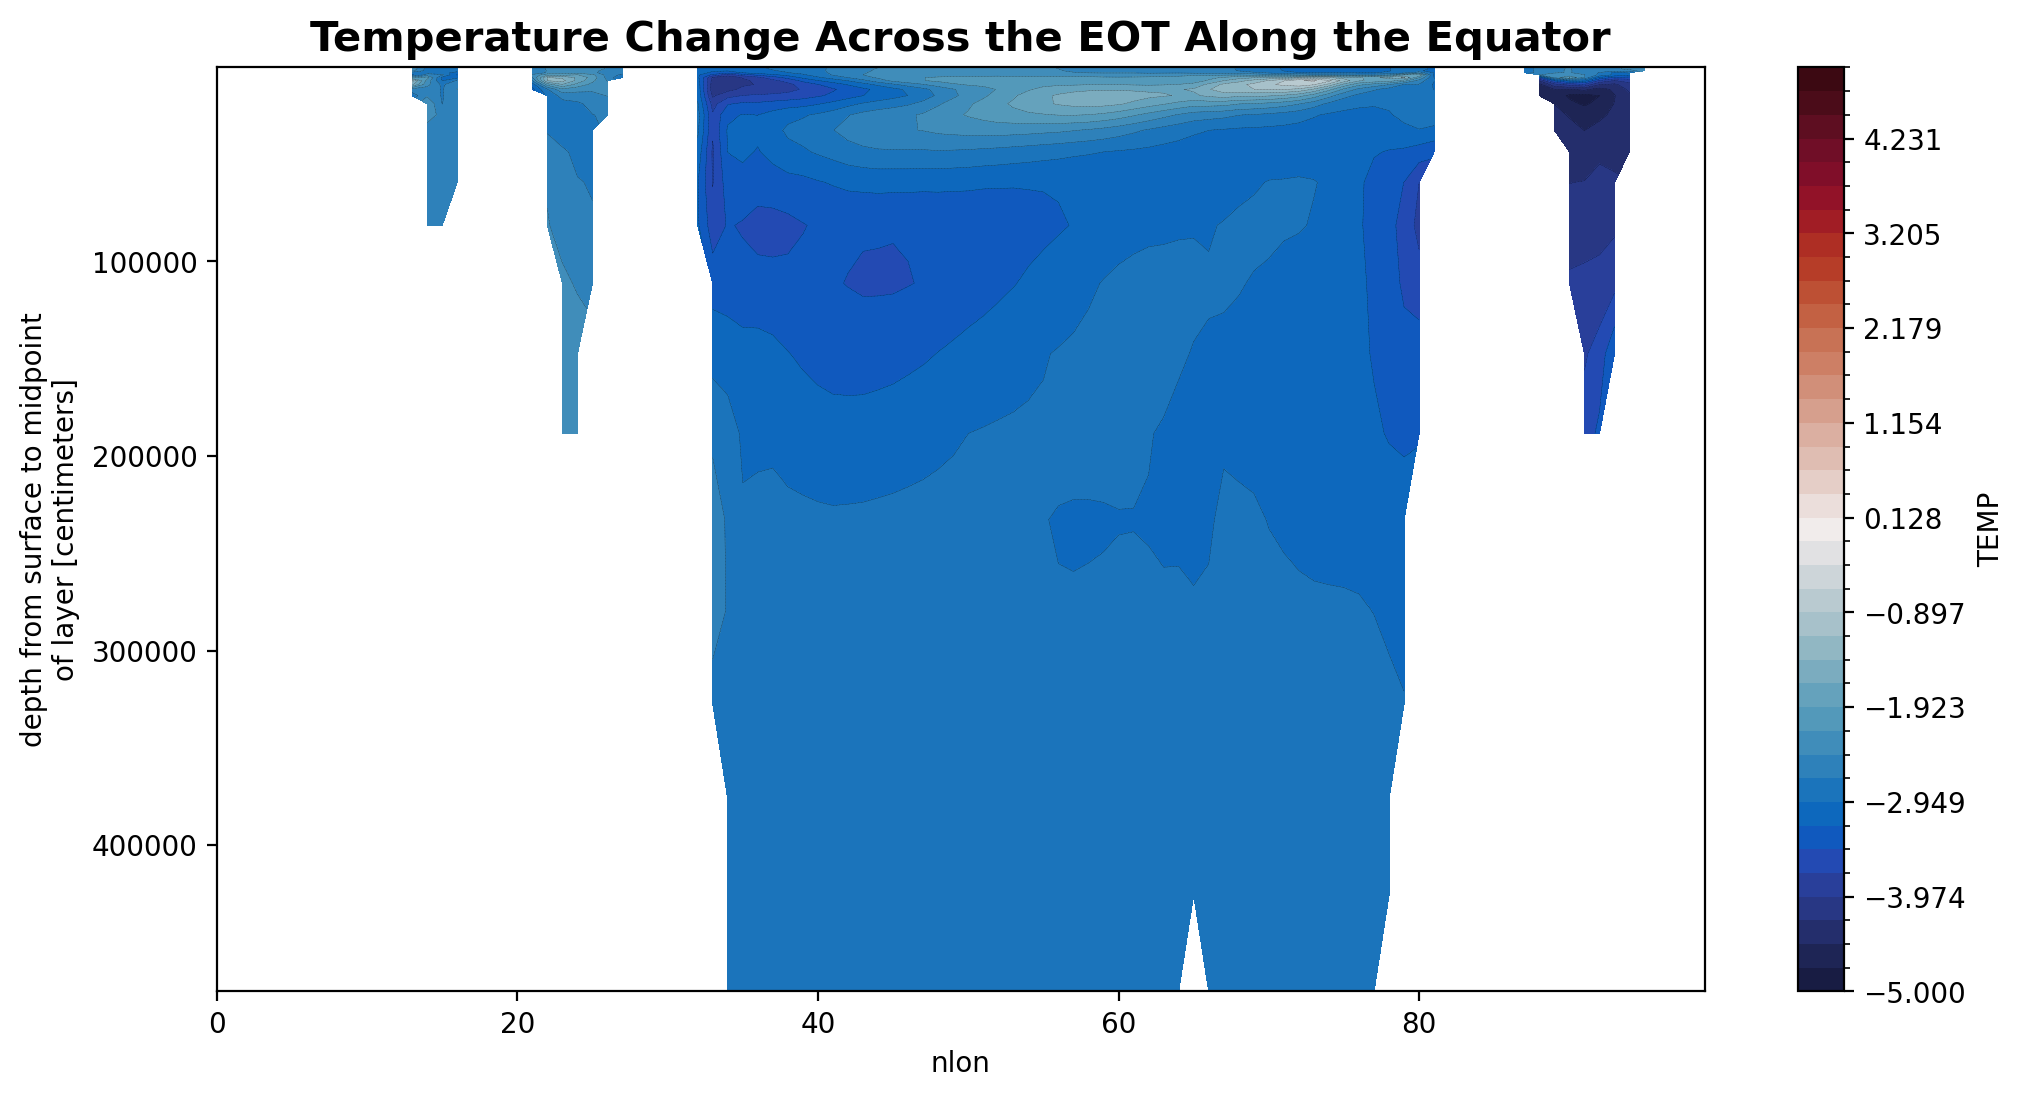

In [18]:
#Plot temperature difference across EOT along equator 
diff_equator.plot.contourf(yincrease=False,vmin=-5, #Add cbar for temp change gradient
              vmax=5,levels=40,
              cmap=cmocean.cm.balance)
diff_equator.plot.contour(yincrease=False, #Add lines between temp differences
             vmin=-5,
             vmin=-5,
             vmax=5,
             levels=40,colors='black',linewidths=0.1)
plt.title("CESM-H: Temperature Change Across the EOT Along the Equator", fontweight='bold', fontsize=15) #Set title

#### **Figure 6.** Transect of sea temperature change over the EOT boundary across the Equator in degrees Celsius. The upper 300m do not change in temperature. From a depth of 300 to 2000m, the temperature gradient decreases to a maximum of 4 degrees. Depths below 2000m show an average decrease of 3 degrees. Temperature data used was generated by the CESM-H model. Model data was run and compiled by Goldner et al (2014).

### SAT Data

In [19]:
### CESM-H Atmosphere data

### Pre EOT
cesmh_atm_PREEOT = xr.open_dataset('B.EO_2_C4xt31_h.cam2.climo.cat.nc')
cesmh_atm_cg_PREEOT = xr.open_dataset('B.EO_2_C4xt31_h.cam2.climo.cat_um_bil.nc')

### Post EOT
cesmh_atm_POSTEOT = xr.open_dataset('B.EO_1_C4xt31_h.cam2.climo.cat.nc')
cesmh_atm_cg_POSTEOT = xr.open_dataset('B.EO_1_C4xt31_h.cam2.climo.cat_um_bil.nc')

In [20]:
cesmh_atm_PREEOT

<xarray.Dataset>
Dimensions:    (time: 12, lat: 48, lon: 96, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -87.16 -83.48 -79.78 -76.07 ... 79.78 83.48 87.16
  * lon        (lon) float64 0.0 3.75 7.5 11.25 15.0 ... 345.0 348.8 352.5 356.2
  * time       (time) object 3631-08-02 12:00:00 ... 3632-01-01 00:00:00
Dimensions without coordinates: nbnd
Data variables:
    TREFHT     (time, lat, lon) float32 ...
    TS         (time, lat, lon) float32 ...
    time_bnds  (time, nbnd) object ...
Attributes: (12/13)
    Conventions:               CF-1.0
    source:                    CAM
    case:                      B.EO_2_C4xt31_h
    title:                     UNSET
    logname:                   agoldner
    host:                      hansen-a066.rcac
    ...                        ...
    revision_Id:               $Id$
    initial_file:              /scratch/lustreC/h/huberm/cesm1_build/B.EO_2_C...
    topography_file:           /usr/rmt_share/easscratch/huberm/agoldner/ccsm...
    history:                   Mon Jun  7 05:46:25 2021: ncks -v TS,TREFHT B....
    nco_openmp_thread_number:  1
    NCO:                       netCDF Operators version 4.7.9 (Homepage = htt...

In [21]:
cesmh_atm_POSTEOT

<xarray.Dataset>
Dimensions:    (time: 12, lat: 48, lon: 96, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -87.16 -83.48 -79.78 -76.07 ... 79.78 83.48 87.16
  * lon        (lon) float64 0.0 3.75 7.5 11.25 15.0 ... 345.0 348.8 352.5 356.2
  * time       (time) object 3407-02-01 00:00:00 ... 3407-01-01 00:00:00
Dimensions without coordinates: nbnd
Data variables:
    TREFHT     (time, lat, lon) float32 ...
    TS         (time, lat, lon) float32 ...
    time_bnds  (time, nbnd) object ...
Attributes: (12/13)
    Conventions:               CF-1.0
    source:                    CAM
    case:                      B.EO_1_C4xt31_h
    title:                     UNSET
    logname:                   agoldner
    host:                      hansen-a064.rcac
    ...                        ...
    revision_Id:               $Id$
    initial_file:              /scratch/lustreC/h/huberm/cesm1_build/B.EO_1_C...
    topography_file:           /usr/rmt_share/easscratch/huberm/agoldner/ccsm...
    history:                   Mon Jun  7 05:45:29 2021: ncks -v TS,TREFHT B....
    nco_openmp_thread_number:  1
    NCO:                       netCDF Operators version 4.7.9 (Homepage = htt...

In [22]:
#Define SAT variables for pre- and post- EOT 
pre_cesmh_atm_PREEOT = cesmh_atm_PREEOT.isel(time=0)
post_cesmh_atm_POSTEOT = cesmh_atm_POSTEOT.isel(time=0)

In [23]:
#Fine difference in SAT across EOT boundary
cesmh_atm_diff_POST_PRE = post_cesmh_atm_POSTEOT - pre_cesmh_atm_PREEOT

In [24]:
cesmh_atm_diff_POST_PRE

<xarray.Dataset>
Dimensions:    (lat: 48, lon: 96, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -87.16 -83.48 -79.78 -76.07 ... 79.78 83.48 87.16
  * lon        (lon) float64 0.0 3.75 7.5 11.25 15.0 ... 345.0 348.8 352.5 356.2
Dimensions without coordinates: nbnd
Data variables:
    TREFHT     (lat, lon) float32 -5.777 -5.776 -5.775 ... -29.66 -29.67 -29.68
    TS         (lat, lon) float32 -5.705 -5.689 -5.687 ... -31.77 -31.74 -31.74
    time_bnds  (nbnd) timedelta64[ns] -81943 days +12:00:00 -81943 days +12:0...

Text(0.5, 1.0, 'CESM-H: Global SAT Change Across EOT')

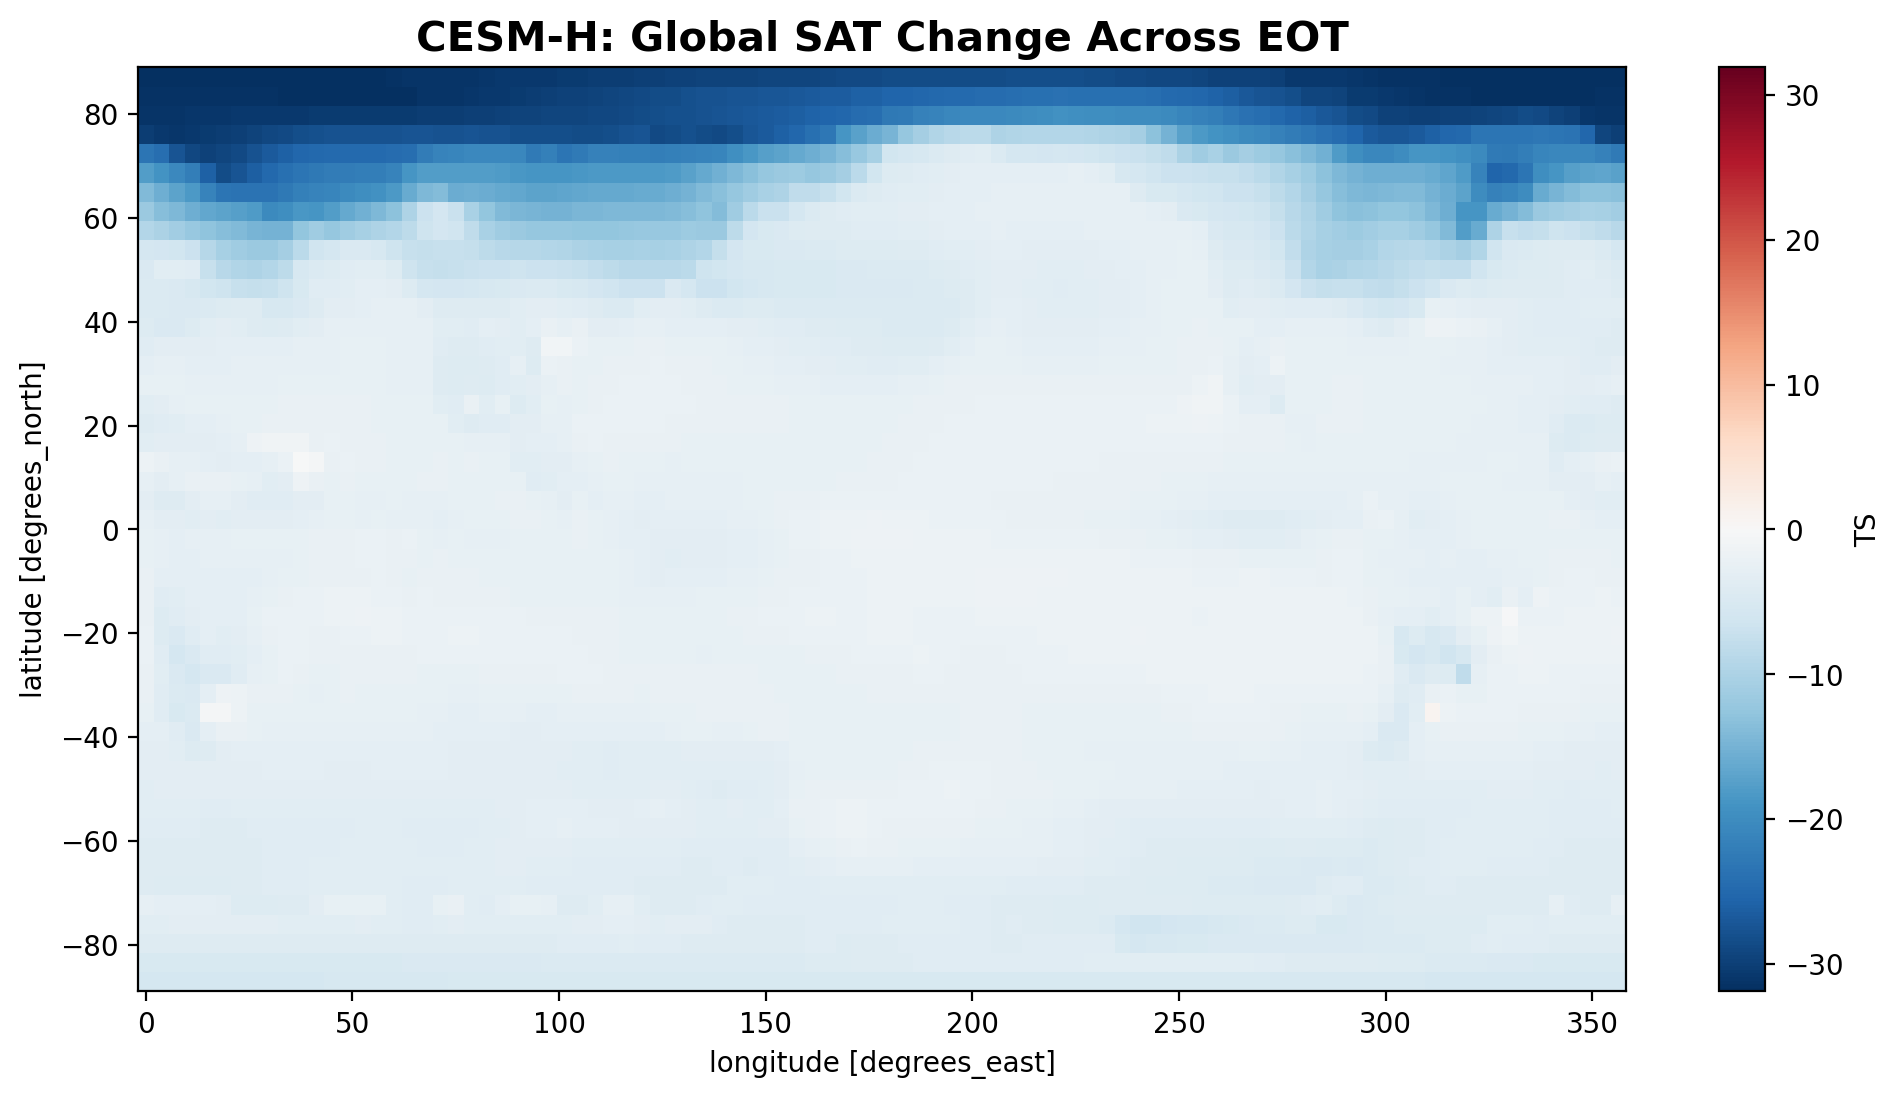

In [25]:
#plot SAT diffrence data
cesmh_atm_diff_POST_PRE.TS.plot()
plt.title("CESM-H: Global SAT Change Across EOT", fontweight="bold",  fontsize=15) #Set title 

## Projections

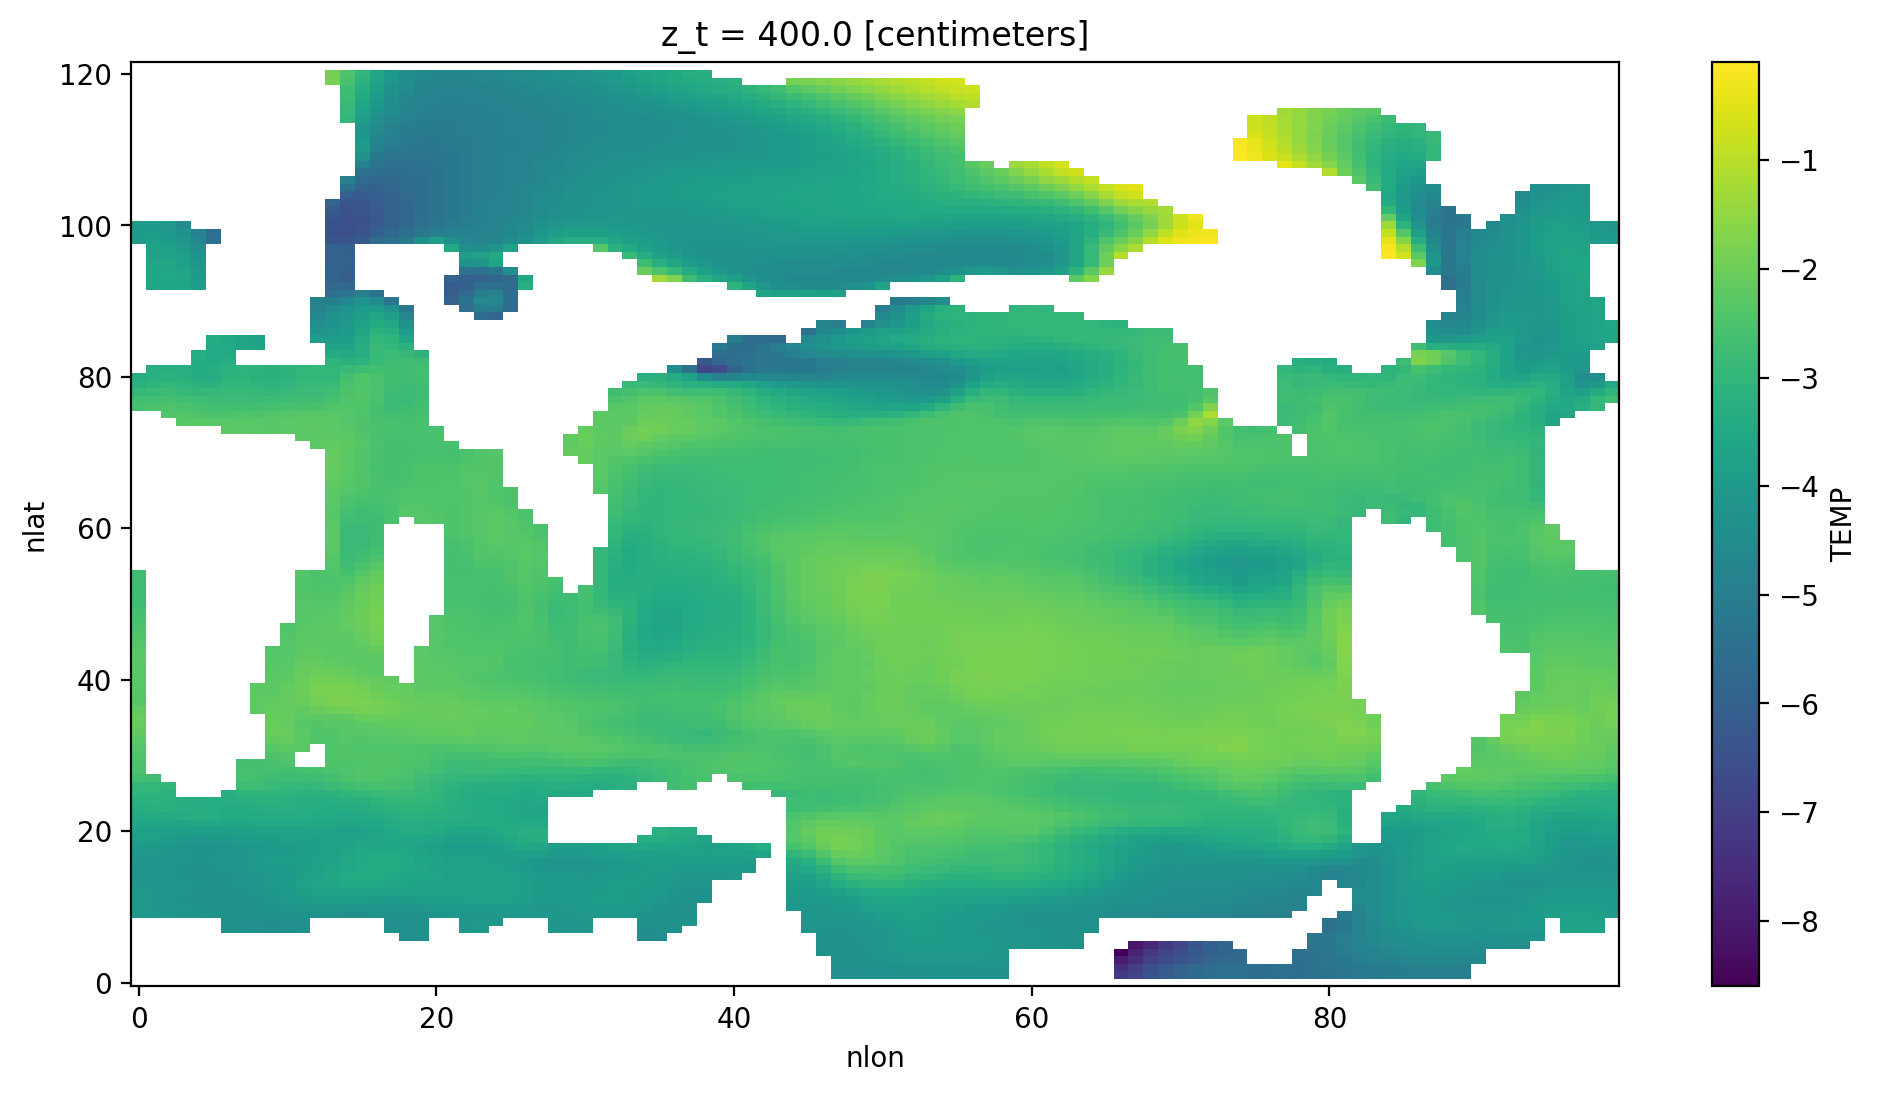

In [26]:
diff_surface.plot()

Text(0.5, 1.0, 'CESM-H: Global SST Change Across EOT')

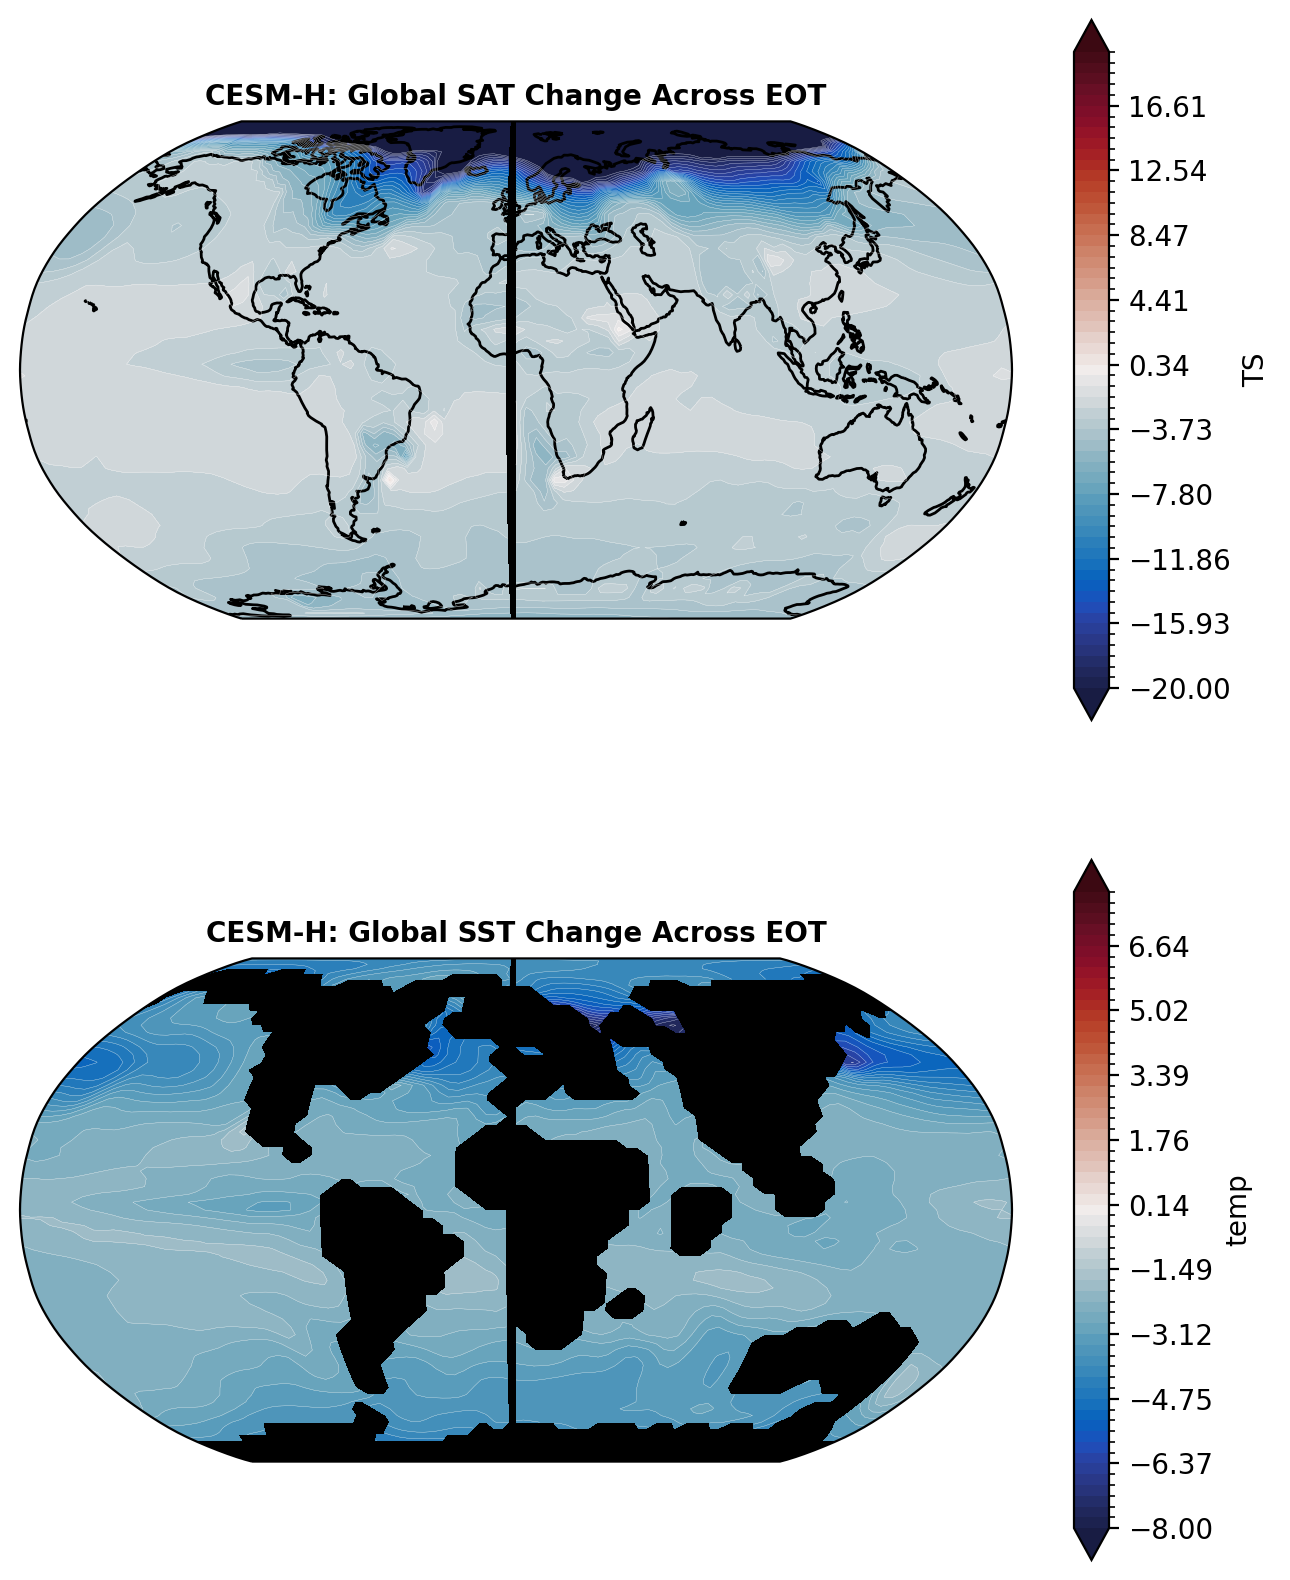

In [28]:
#Define projection type, Set background to black  
subplot_kws=dict(projection=ccrs.Robinson(),
                 facecolor='black') 

#Create 2 figures of SAT and SST on Robinson projections
fig, (ax1, ax2 ) = plt.subplots(ncols=1, #Plot 2 projections
                               nrows=2,
                               figsize=(8,10),
                               subplot_kw=subplot_kws)
cesmh_atm_diff_POST_PRE.TS.plot.contourf(ax=ax1, #Plot CESM-H SAT change across the EOT boundary, smooth out contours 
                              cmap=cmocean.cm.balance,
                              extend='both',vmin=-20,vmax=20,
                            transform=ccrs.PlateCarree(),levels=60,)

cesmh_atm_diff_POST_PRE.TS.plot.contour(ax=ax1,  #Add boundaries between temp changes
                              colors='white',linestyles='-',linewidths=0.1,
                              extend='both',vmin=-20,vmax=20,
                            transform=ccrs.PlateCarree(),levels=60,)
ax1.set_title("CESM-H: Global SAT Change Across EOT", fontweight="bold",  fontsize=10) #Set title

ax1.coastlines() #Add modern day coastlines


diff_sst.temp.plot.contourf(ax=ax2,
                              cmap=cmocean.cm.balance,    #Plot CESM-H SST change across the EOT boundary, smooth out contours 
                              extend='both',vmin=-8,vmax=8,
                            transform=ccrs.PlateCarree(),levels=60,)

diff_sst.temp.plot.contour(ax=ax2,  #Add boundaries between temp changes
                              colors='white',linestyles='-',linewidths=0.1,
                              extend='both',vmin=-8,vmax=8,
                            transform=ccrs.PlateCarree(),levels=60,)
ax2.set_title("CESM-H: Global SST Change Across EOT", fontweight="bold",  fontsize=10) #Set title



#### **Figure 7.** Global SAT change, top, and global SST change, bottom, before and after the EOT using data generated from the CESM-H model. Overall, there is a decreasing trend in both SAT and SST. SAT saw a decrease in temperature ranging from 0.5 to 10 degrees Celsius, averaging 2 degrees. Decreasing SAT was homogenous throughout the globe except for the Arctic, which saw the greatest decrease at around 20 degrees. SST saw a decrease in temperature ranging from 1.5 to 6.5 degrees, averaging around 3 degrees. The northern hemisphere saw a greater cooling than the southern hemisphere. Model data was run and compiled by Goldner et al (2014).